In [1]:
import networkx as nx
from pyvis.network import Network
import json
import numpy

In [3]:
with open('techcrunch_200_latest_pages.json', 'r', encoding='utf-8') as f:
    network_data = json.load(f)
len(network_data.keys())

5991

In [3]:
print(network_data.get('x'))

None


In [7]:
net = Network(notebook=True, cdn_resources='remote')

In [9]:
col1, col2 = [], []
for url in network_data.keys():
    net.add_node(url, network_data[url]['title'])
unknowns = 0
for url in network_data.keys():
    for link in network_data[url]['hyperlinks']:
        if not net.node_map.get(link):
            net.add_node(link, f'unknown article {unknowns}')
            unknowns += 1
for url in network_data.keys():
    for link in network_data[url]['hyperlinks']:
        net.add_edge(url, link)


In [61]:
net.show('techcrunch_net_vis.html')

techcrunch_net_vis.html


In [41]:
print(net.node_map.get('asdf'))

None


In [25]:
len(net.node_map.keys())

12251

In [33]:
numpy.savetxt('gephi_visualization.csv', numpy.array([[col1[i], col2[i]] for i in range(len(col1))]), delimiter=',', fmt='%s', encoding='utf-8')

In [27]:
col2[-10:]

['https://techcrunch.com/2022/09/01/zenly-is-still-hugely-popular-so-whys-snap-shutting-it-down/',
 'https://techcrunch.com/2021/06/28/foursquare-founder-dennis-crowley-steps-back-from-the-company/',
 'https://techcrunch.com/2014/05/01/foursquare-splits-into-two-apps-but-will-either-be-strong-enough-to-survive/',
 'https://techcrunch.com/2022/05/11/faye-hopes-to-do-for-travel-insurance-what-lemonade-did-for-general-insurance/',
 'https://techcrunch.com/2022/04/28/submit-your-pitch-deck-for-review/',
 'https://techcrunch.com/2022/12/09/summary-slide/',
 'https://techcrunch.com/2023/01/31/team-slide/',
 'https://techcrunch.com/2022/09/18/investors-dgaf-about-your-product/',
 'https://techcrunch.com/2023/02/07/solution-vs-product-in-pitch-deck/',
 'https://techcrunch.com/2022/04/28/submit-your-pitch-deck-for-review/']

In [13]:
adj_list = net.get_adj_list()

In [57]:
dist = []
for i in adj_list.keys():
    dist.append(len(adj_list[i]))

In [61]:
import matplotlib.pyplot as plt

In [81]:
s_dist = sorted(dist, reverse=True)

In [107]:
numpy.argmax(list(adj_list.keys()))

10673

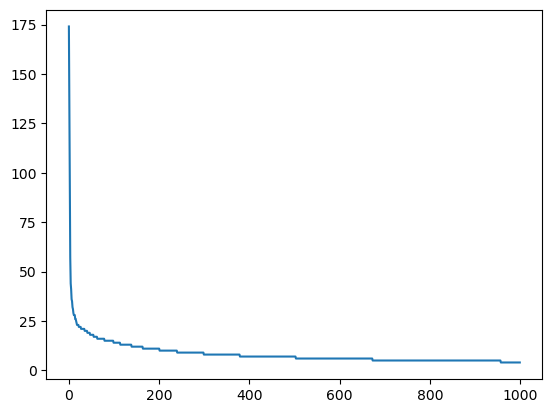

In [95]:
list(adj_list.keys())

In [15]:

for i in adj_list.keys():
    col1.append([i] + [t for t in adj_list[i]])
    

In [25]:
col1[:5]

[['https://techcrunch.com/2025/10/03/with-its-latest-acqui-hire-openai-is-doubling-down-on-personalized-consumer-ai/',
  'https://techcrunch.com/2025/04/15/openai-hires-team-behind-gv-backed-ai-eval-platform-context-ai/',
  'https://techcrunch.com/2025/06/27/openai-hires-team-behind-ai-recommendation-startup-crossing-minds/',
  'https://techcrunch.com/2025/05/07/instacart-ceo-fidji-simo-is-joining-openai/',
  'https://techcrunch.com/2025/09/29/openai-takes-on-google-amazon-with-new-agentic-shopping-system/',
  'https://techcrunch.com/2025/09/23/openai-is-building-five-new-stargate-data-centers-with-oracle-and-softbank/',
  'https://techcrunch.com/2025/09/25/openai-launches-chatgpt-pulse-to-proactively-write-you-morning-briefs/',
  'https://techcrunch.com/2025/09/05/openai-hires-the-team-behind-xcode-coding-assistant-alex-codes/',
  'https://techcrunch.com/2025/09/30/openai-is-launching-the-sora-app-its-own-tiktok-competitor-alongside-the-sora-2-model/'],
 ['https://techcrunch.com/2025/

In [27]:
adj_list['https://techcrunch.com/2025/10/03/with-its-latest-acqui-hire-openai-is-doubling-down-on-personalized-consumer-ai/']

{'https://techcrunch.com/2025/04/15/openai-hires-team-behind-gv-backed-ai-eval-platform-context-ai/',
 'https://techcrunch.com/2025/05/07/instacart-ceo-fidji-simo-is-joining-openai/',
 'https://techcrunch.com/2025/06/27/openai-hires-team-behind-ai-recommendation-startup-crossing-minds/',
 'https://techcrunch.com/2025/09/05/openai-hires-the-team-behind-xcode-coding-assistant-alex-codes/',
 'https://techcrunch.com/2025/09/23/openai-is-building-five-new-stargate-data-centers-with-oracle-and-softbank/',
 'https://techcrunch.com/2025/09/25/openai-launches-chatgpt-pulse-to-proactively-write-you-morning-briefs/',
 'https://techcrunch.com/2025/09/29/openai-takes-on-google-amazon-with-new-agentic-shopping-system/',
 'https://techcrunch.com/2025/09/30/openai-is-launching-the-sora-app-its-own-tiktok-competitor-alongside-the-sora-2-model/'}

In [17]:
numpy.savetxt('gephi_adj_latest_list.csv', numpy.array(col1), delimiter=',', fmt='%s', encoding='utf-8')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12251,) + inhomogeneous part.

In [19]:
import pandas

In [21]:
df = pandas.DataFrame(col1)

In [23]:
df.to_csv('gephi_adj_latest_list.csv')